In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install catboost

In [3]:
test_file_path = '/content/drive/MyDrive/test.csv'
testData = pd.read_csv(test_file_path)
train_file_path= '/content/drive/MyDrive/train.csv'
trainData = pd.read_csv(train_file_path)
testData.shape,trainData.shape

((1459, 80), (1460, 81))

In [4]:
testData.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
trainData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
trainData.columns,testData.columns

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [7]:
features_test=list(testData.columns)
features_train=list(trainData.columns)

print(len(features_test))
print(len(features_train))



80
81


In [8]:
x_test=testData
x_train=trainData.drop(columns=['SalePrice'])
y_train=trainData['SalePrice']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)



(1460, 80)
(1460,)
(1459, 80)


In [9]:
features_test=list(x_test.columns)
features_train=list(x_train.columns)
print(len(features_test)==len(features_train))

True


In [10]:
for i in range(len(features_test)):
  if (features_train[i]!=features_test[i]):
    print("il ya un feature qui n'est pas le même")


In [11]:
x_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [14]:

x_test=x_test.drop(columns=['MasVnrType','FireplaceQu','MiscFeature'])
x_train=x_train.drop(columns=['MasVnrType','FireplaceQu','MiscFeature'])

colonneNotNull=['Alley','PoolQC','Fence']

In [15]:
# Remplacer les valeurs NaN par 'None' pour les colonnes concernées
for col in colonneNotNull:
    x_train[col] = x_train[col].fillna("None").str.strip()
    x_test[col] = x_test[col].fillna("None").str.strip()

# Encodage ordinal pour PoolQC (qualité piscine)
pool_qc_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0}  # 'None' = Pas de piscine
x_train['PoolQC'] = x_train['PoolQC'].map(pool_qc_mapping)
x_test['PoolQC'] = x_test['PoolQC'].map(pool_qc_mapping)

# Encodage one-hot pour les autres variables catégorielles
x_train = pd.get_dummies(x_train, columns=['Alley', 'Fence'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Alley', 'Fence'], drop_first=True)


# Vérification des modifications
x_train.head()
x_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,Alley_None,Alley_Pave,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,6,2010,WD,Normal,True,False,False,True,False,False
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,6,2010,WD,Normal,True,False,False,False,False,True
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,3,2010,WD,Normal,True,False,False,True,False,False
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,6,2010,WD,Normal,True,False,False,False,False,True
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,1,2010,WD,Normal,True,False,False,False,False,True


In [16]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
# on garde les id de x_test pour le submission csv , mais on peut enlever ceux du x_train

x_train=x_train.drop(columns=['Id'])
x_test_id=x_test['Id']
x_test=x_test.drop(columns=['Id'])
x_test


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,Alley_None,Alley_Pave,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,6,2010,WD,Normal,True,False,False,True,False,False
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,6,2010,WD,Normal,True,False,False,False,False,True
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,3,2010,WD,Normal,True,False,False,True,False,False
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,6,2010,WD,Normal,True,False,False,False,False,True
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,1,2010,WD,Normal,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,6,2006,WD,Normal,True,False,False,False,False,True
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,4,2006,WD,Abnorml,True,False,False,False,False,True
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,9,2006,WD,Abnorml,True,False,False,False,False,True
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,7,2006,WD,Normal,True,False,False,True,False,False


In [19]:
#traitement des features categorielle
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Identifier les colonnes numériques et catégorielles


categorical_nominal = [
    'MSZoning', 'Street',  'LotConfig', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive',
     'SaleType', 'SaleCondition','MSSubClass', 'Utilities'
]

categorical_ordinal = [
    'LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'HeatingQC', 'KitchenQual', 'Functional',  'GarageFinish',
    'GarageQual', 'GarageCond'
]

numeric = [
     'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
    'MoSold', 'YrSold'
]


features=categorical_nominal+categorical_ordinal+numeric
print(len(features))

73


In [20]:
import numpy as np
import pandas as pd
from scipy import stats

# Fusion des données
data = x_train.copy()
data['SalePrice'] = y_train

# Liste des colonnes numériques
numeric = [
    'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
    'MoSold', 'YrSold'
]

from collections import defaultdict
from scipy import stats
import numpy as np

# Dictionnaire pour stocker les indices et leur z-score extrême
index_zscore_max = defaultdict(float)

# Calcul des z-scores pour chaque (feature, SalePrice)
for feature in numeric:
    subset = data[[feature, 'SalePrice']].dropna()
    z = np.abs(stats.zscore(subset))  # shape (n, 2)
    max_z = np.max(z, axis=1)         # score max entre feature et SalePrice

    for idx, score in zip(subset.index, max_z):
        index_zscore_max[idx] = max(index_zscore_max[idx], score)

# Garder les 30 lignes les plus extrêmes
sorted_outliers = sorted(index_zscore_max.items(), key=lambda x: x[1], reverse=True)
top_outliers = [idx for idx, _ in sorted_outliers[:6]]

print(f"Suppression des {len(top_outliers)} outliers les plus extrêmes liés aux features numériques et à SalePrice")

# Supprimer dans les jeux d'entraînement
x_train = x_train.drop(index=top_outliers)
y_train = y_train.drop(index=top_outliers)

# Réindexer proprement
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)



Suppression des 6 outliers les plus extrêmes liés aux features numériques et à SalePrice


In [21]:
#Descritpiion des données
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def describe_data(data):
    description = data.describe(include='all')
    return description


data_description = describe_data(x_train)
print(data_description)





         MSSubClass MSZoning  LotFrontage        LotArea Street LotShape  \
count   1454.000000     1454  1198.000000    1454.000000   1454     1454   
unique          NaN        5          NaN            NaN      2        4   
top             NaN       RL          NaN            NaN   Pave      Reg   
freq            NaN     1145          NaN            NaN   1448      923   
mean      56.960110      NaN    69.952421   10361.747593    NaN      NaN   
std       42.330295      NaN    24.189351    8429.455652    NaN      NaN   
min       20.000000      NaN    21.000000    1300.000000    NaN      NaN   
25%       20.000000      NaN    59.000000    7536.250000    NaN      NaN   
50%       50.000000      NaN    69.000000    9458.500000    NaN      NaN   
75%       70.000000      NaN    80.000000   11576.250000    NaN      NaN   
max      190.000000      NaN   313.000000  164660.000000    NaN      NaN   

       LandContour Utilities LotConfig LandSlope  ...       MoSold  \
count         145

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


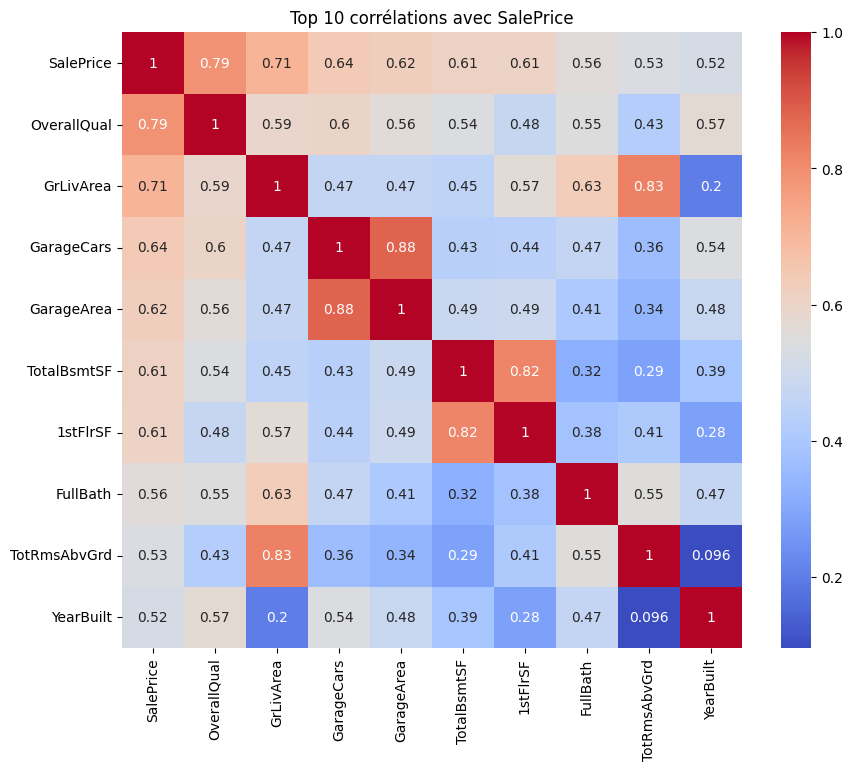

In [22]:
#Corrélation avec la variable cible

# Corrélation
corr = trainData.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(corr.head(10))  # top corrélées
print(corr.tail(5))   # inversément corrélées

# Heatmap
plt.figure(figsize=(10,8))
top_corr = trainData.corr(numeric_only=True).nlargest(10, 'SalePrice')['SalePrice'].index
sns.heatmap(trainData[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 corrélations avec SalePrice")
plt.show()


In [23]:
#visualisation des correlation > 0,7
# Variables très corrélées
threshold = 0.7
corr_matrix = trainData.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = [column for column in upper.columns if any(upper[column] > threshold)]
print("Variables très corrélées entre elles (corr > 0.7):", high_corr)


Variables très corrélées entre elles (corr > 0.7): ['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']


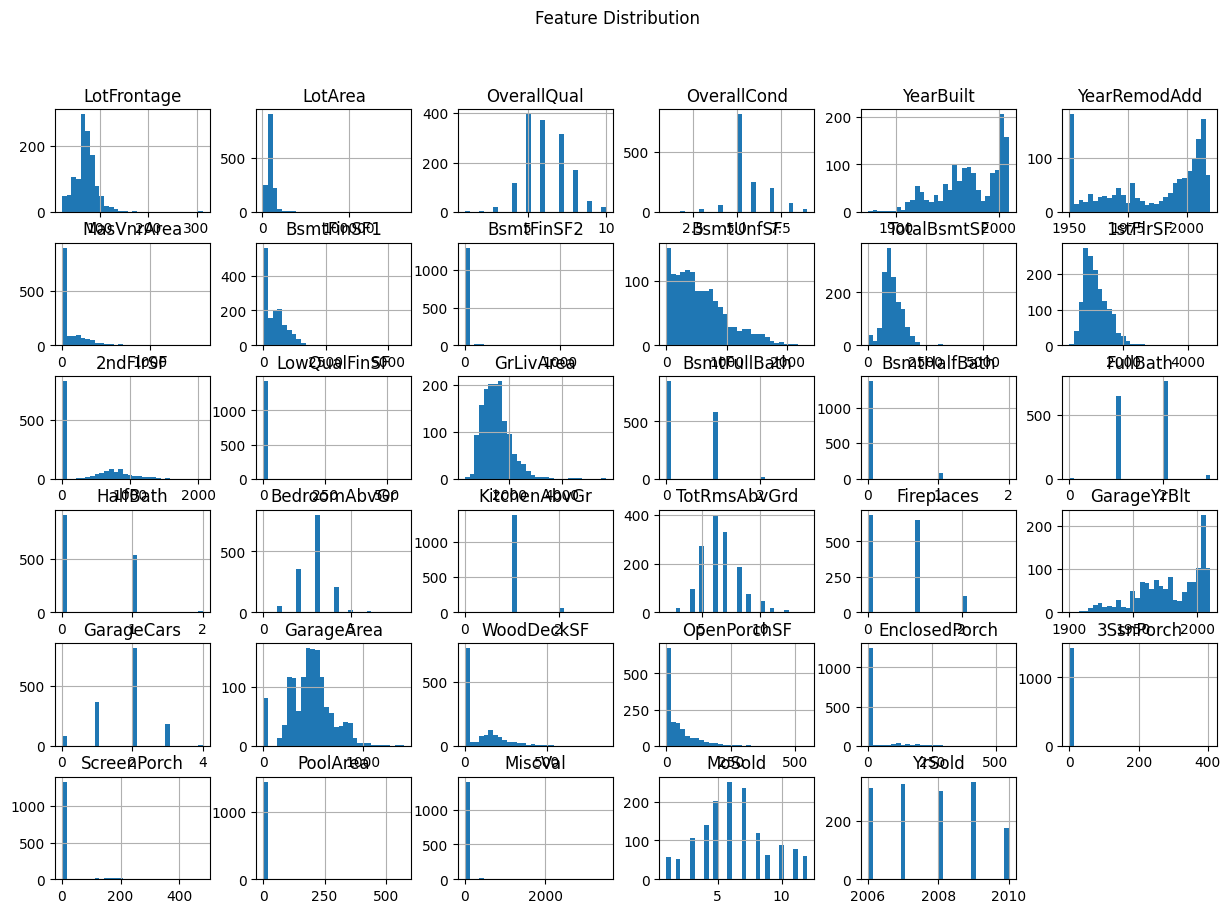

In [24]:
# Visualiser la distribution des données des valeur numeric
x_train[numeric].hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distribution')
plt.show()


In [25]:
#test D'anova ( le quartier influence il le prix de vente )

import scipy.stats as stats

groups = [y["SalePrice"].values for x, y in trainData.groupby("Neighborhood")]
anova_result = stats.f_oneway(*groups)
print(f"p-value ANOVA pour Neighborhood ~ SalePrice: {anova_result.pvalue:.4f}")


p-value ANOVA pour Neighborhood ~ SalePrice: 0.0000


In [26]:
# encoding categorical ordinal features

ordinal_mappings = {
    'LotShape': {
        'Reg': 3,
        'IR1': 2,
        'IR2': 1,
        'IR3': 0

    },

    'LandContour': {
        'Lvl': 3,
        'Bnk': 2,
        'HLS': 1,
        'Low': 0

    },
    'LandSlope': {
        'Gtl': 2,
        'Mod': 1,
        'Sev': 0

    },
    'ExterQual': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0

    },
    'ExterCond': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0

    },

    'BsmtQual': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0

    },
    'BsmtCond': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0

    },
    'BsmtExposure': {
        'Gd': 3,
        'Av': 2,
        'Mn': 1,
        'No': 0

    },
    'BsmtFinType1': {
        'GLQ': 6,
        'ALQ': 5,
        'BLQ': 4,
        'Rec': 3,
        'LwQ': 2,
        'Unf': 1

    },
    'BsmtFinType2': {
        'GLQ': 6,
        'ALQ': 5,
        'BLQ': 4,
        'Rec': 3,
        'LwQ': 2,
        'Unf': 1

    },
    'HeatingQC': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0

    },
    'KitchenQual': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0

    },
    'Functional': {
        'Typ': 7,
        'Min1': 6,
        'Min2': 5,
        'Mod': 4,
        'Maj1': 3,
        'Maj2': 2,
        'Sev': 1,
        'Sal': 0

    },
    'GarageFinish': {
        'Fin': 3,
        'RFn': 2,
        'Unf': 1

    },
    'GarageQual': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0,

    },
    'GarageCond': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0

    }
}



In [27]:

# Function to strip spaces and map ordinal values
def clean_and_map_ordinal_values(df, mappings):
  for feature, mapping in mappings.items():
    df[feature] = df[feature].apply(lambda x: mapping[str(x).strip()] if str(x).strip() in mapping else x)
  return df

# Apply the function to x_train
x_train = clean_and_map_ordinal_values(x_train, ordinal_mappings)
x_train.info()

x_train[categorical_ordinal]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1454 non-null   int64  
 1   MSZoning       1454 non-null   object 
 2   LotFrontage    1198 non-null   float64
 3   LotArea        1454 non-null   int64  
 4   Street         1454 non-null   object 
 5   LotShape       1454 non-null   int64  
 6   LandContour    1454 non-null   int64  
 7   Utilities      1454 non-null   object 
 8   LotConfig      1454 non-null   object 
 9   LandSlope      1454 non-null   int64  
 10  Neighborhood   1454 non-null   object 
 11  Condition1     1454 non-null   object 
 12  Condition2     1454 non-null   object 
 13  BldgType       1454 non-null   object 
 14  HouseStyle     1454 non-null   object 
 15  OverallQual    1454 non-null   int64  
 16  OverallCond    1454 non-null   int64  
 17  YearBuilt      1454 non-null   int64  
 18  YearRemo

,LotShape,LandContour,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond
0,3,3,2,3,2,3.0,2.0,0.0,6.0,1.0,4,3,7,2.0,2.0,2.0
1,3,3,2,2,2,3.0,2.0,3.0,5.0,1.0,4,2,7,2.0,2.0,2.0
2,2,3,2,3,2,3.0,2.0,1.0,6.0,1.0,4,3,7,2.0,2.0,2.0
3,2,3,2,2,2,2.0,3.0,0.0,5.0,1.0,3,3,7,1.0,2.0,2.0
4,2,3,2,3,2,3.0,2.0,2.0,6.0,1.0,4,3,7,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,3,3,2,2,2,3.0,2.0,0.0,1.0,1.0,4,2,7,2.0,2.0,2.0
1450,3,3,2,2,2,3.0,2.0,0.0,5.0,3.0,2,2,6,1.0,2.0,2.0
1451,3,3,2,4,3,2.0,3.0,0.0,6.0,1.0,4,3,7,2.0,2.0,2.0
1452,3,3,2,2,2,2.0,2.0,1.0,6.0,3.0,3,3,7,1.0,2.0,2.0


In [28]:
x_test = clean_and_map_ordinal_values(x_test, ordinal_mappings)
x_test.info()
x_test[categorical_ordinal]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   int64  
 6   LandContour    1459 non-null   int64  
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   int64  
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

,LotShape,LandContour,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond
0,3,3,2,2,2,2.0,2.0,0.0,3.0,2.0,2,2.0,7.0,1.0,2.0,2.0
1,2,3,2,2,2,2.0,2.0,0.0,5.0,1.0,2,3.0,7.0,1.0,2.0,2.0
2,2,3,2,2,2,3.0,2.0,0.0,6.0,1.0,3,2.0,7.0,3.0,2.0,2.0
3,2,3,2,2,2,2.0,2.0,0.0,6.0,1.0,4,3.0,7.0,3.0,2.0,2.0
4,2,1,2,3,2,3.0,2.0,0.0,5.0,1.0,4,3.0,7.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,3,2,2,2,2.0,2.0,0.0,1.0,1.0,3,2.0,7.0,NaN,NaN,NaN
1455,3,3,2,2,2,2.0,2.0,0.0,3.0,1.0,2,2.0,7.0,1.0,2.0,2.0
1456,3,3,2,2,2,2.0,2.0,0.0,5.0,1.0,4,2.0,7.0,1.0,2.0,2.0
1457,3,3,2,2,2,3.0,2.0,2.0,6.0,1.0,2,2.0,7.0,NaN,NaN,NaN


In [29]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   int64  
 6   LandContour    1459 non-null   int64  
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   int64  
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [30]:
# Imputer pour les features nominales (valeur la plus fréquente)
imputer_nominal = SimpleImputer(strategy='most_frequent')
x_train[categorical_nominal] = imputer_nominal.fit_transform(x_train[categorical_nominal])
x_test[categorical_nominal] = imputer_nominal.transform(x_test[categorical_nominal])

# Imputer pour les features ordinales (médiane)
imputer_ordinal = SimpleImputer(strategy='median')
x_train[categorical_ordinal] = imputer_ordinal.fit_transform(x_train[categorical_ordinal])
x_test[categorical_ordinal] = imputer_ordinal.transform(x_test[categorical_ordinal])

# Imputer pour les features numériques (moyenne)
imputer_numeric = SimpleImputer(strategy='median')
x_train[numeric] = imputer_numeric.fit_transform(x_train[numeric])
x_test[numeric] = imputer_numeric.transform(x_test[numeric])

x_train.info(),x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1454 non-null   object 
 1   MSZoning       1454 non-null   object 
 2   LotFrontage    1454 non-null   float64
 3   LotArea        1454 non-null   float64
 4   Street         1454 non-null   object 
 5   LotShape       1454 non-null   float64
 6   LandContour    1454 non-null   float64
 7   Utilities      1454 non-null   object 
 8   LotConfig      1454 non-null   object 
 9   LandSlope      1454 non-null   float64
 10  Neighborhood   1454 non-null   object 
 11  Condition1     1454 non-null   object 
 12  Condition2     1454 non-null   object 
 13  BldgType       1454 non-null   object 
 14  HouseStyle     1454 non-null   object 
 15  OverallQual    1454 non-null   float64
 16  OverallCond    1454 non-null   float64
 17  YearBuilt      1454 non-null   float64
 18  YearRemo

(None, None)

In [31]:

from sklearn.preprocessing import OneHotEncoder


# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the encoder on x_train
encoded_train = encoder.fit_transform(x_train[categorical_nominal])

# Transform x_test using the fitted encoder
encoded_test = encoder.transform(x_test[categorical_nominal])

# Convert the encoded arrays back to DataFrames
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_nominal))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_nominal))

# Drop the original categorical columns from x_train and x_test
x_train = x_train.drop(columns=categorical_nominal)
x_test = x_test.drop(columns=categorical_nominal)

# Concatenate the encoded columns with the rest of the DataFrame
x_train = pd.concat([x_train, encoded_train_df], axis=1)
x_test = pd.concat([x_test, encoded_test_df], axis=1)

x_test


,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Utilities_AllPub,Utilities_NoSeWa
0,80.0,11622.0,3.0,3.0,2.0,5.0,6.0,1961.0,1961.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,81.0,14267.0,2.0,3.0,2.0,6.0,6.0,1958.0,1958.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,74.0,13830.0,2.0,3.0,2.0,5.0,5.0,1997.0,1998.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,78.0,9978.0,2.0,3.0,2.0,6.0,6.0,1998.0,1998.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,43.0,5005.0,2.0,1.0,2.0,8.0,5.0,1992.0,1992.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936.0,3.0,3.0,2.0,4.0,7.0,1970.0,1970.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1455,21.0,1894.0,3.0,3.0,2.0,4.0,5.0,1970.0,1970.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1456,160.0,20000.0,3.0,3.0,2.0,5.0,7.0,1960.0,1996.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,62.0,10441.0,3.0,3.0,2.0,5.0,5.0,1992.0,1992.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:

#traitement de quelques features numériques
x_train['TotalSF'] = x_train['TotalBsmtSF'] + x_train['1stFlrSF'] + x_train['2ndFlrSF']
x_test['TotalSF'] = x_test['TotalBsmtSF'] + x_test['1stFlrSF'] + x_test['2ndFlrSF']

x_train['TotalBathrooms'] = x_train['FullBath'] + 0.5 * x_train['HalfBath'] + x_train['BsmtFullBath'] + 0.5 * x_train['BsmtHalfBath']
x_test['TotalBathrooms'] = x_test['FullBath'] + 0.5 * x_test['HalfBath'] + x_test['BsmtFullBath'] + 0.5 * x_test['BsmtHalfBath']

x_train['HouseAge'] = 2020 - x_train['YearBuilt']
x_test['HouseAge'] = 2020 - x_test['YearBuilt']

x_train['SinceRemod'] = 2020 - x_train['YearRemodAdd']
x_test['SinceRemod'] = 2020 - x_test['YearRemodAdd']

x_train['HasGarage'] = (x_train['GarageArea'] > 0).astype(int)
x_test['HasGarage'] = (x_test['GarageArea'] > 0).astype(int)

x_train

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,Utilities_AllPub,Utilities_NoSeWa,TotalSF,TotalBathrooms,HouseAge,SinceRemod,HasGarage
0,65.0,8450.0,3.0,3.0,2.0,7.0,5.0,2003.0,2003.0,196.0,...,0.0,0.0,0.0,1.0,0.0,2566.0,3.5,17.0,17.0,1
1,80.0,9600.0,3.0,3.0,2.0,6.0,8.0,1976.0,1976.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2524.0,2.5,44.0,44.0,1
2,68.0,11250.0,2.0,3.0,2.0,7.0,5.0,2001.0,2002.0,162.0,...,0.0,0.0,0.0,1.0,0.0,2706.0,3.5,19.0,18.0,1
3,60.0,9550.0,2.0,3.0,2.0,7.0,5.0,1915.0,1970.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2473.0,2.0,105.0,50.0,1
4,84.0,14260.0,2.0,3.0,2.0,8.0,5.0,2000.0,2000.0,350.0,...,0.0,0.0,0.0,1.0,0.0,3343.0,3.5,20.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,62.0,7917.0,3.0,3.0,2.0,6.0,5.0,1999.0,2000.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2600.0,2.5,21.0,20.0,1
1450,85.0,13175.0,3.0,3.0,2.0,6.0,6.0,1978.0,1988.0,119.0,...,0.0,0.0,0.0,1.0,0.0,3615.0,3.0,42.0,32.0,1
1451,66.0,9042.0,3.0,3.0,2.0,7.0,9.0,1941.0,2006.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3492.0,2.0,79.0,14.0,1
1452,68.0,9717.0,3.0,3.0,2.0,5.0,6.0,1950.0,1996.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2156.0,2.0,70.0,24.0,1


In [33]:
!pip install xgboost

In [34]:
from sklearn.preprocessing import RobustScaler

# --- Initialisation du scaler
scaler = RobustScaler()

# --- Application du scaler uniquement sur les colonnes numériques
x_train[numeric] = scaler.fit_transform(x_train[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])  # Utilisation de transform() au lieu de fit_transform() sur les données de test
y_train

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1449,175000
1450,210000
1451,266500
1452,142125


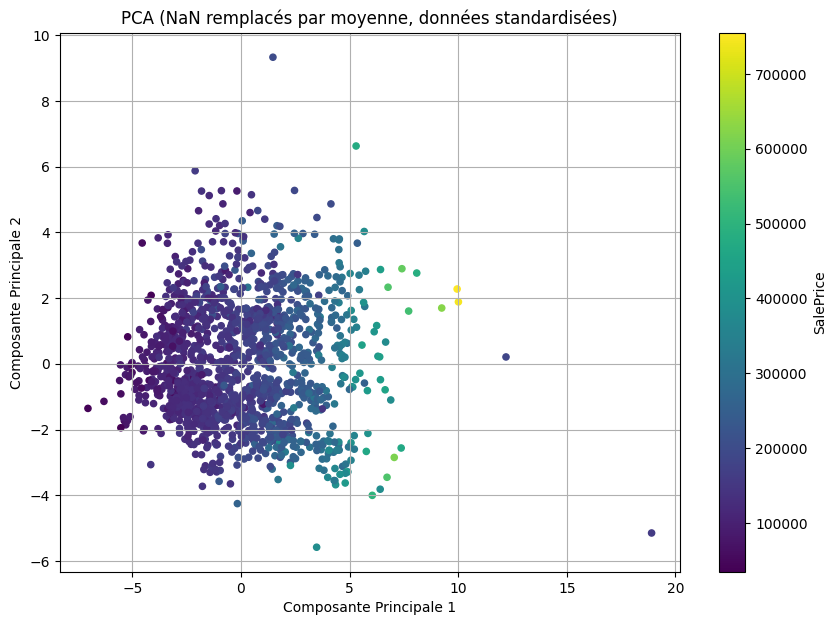

In [35]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Colonnes numériques hors SalePrice
X = trainData.select_dtypes(include='number').drop(columns='SalePrice', errors='ignore')
y = trainData['SalePrice']


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=20)
plt.colorbar(scatter, label='SalePrice')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('PCA (NaN remplacés par moyenne, données standardisées)')
plt.grid(True)
plt.show()




In [36]:
import numpy as np

# --- Application du logarithme naturel sur la colonne 'price'

y_train = y_train = np.log1p(y_train)
y_train




,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
...,...
1449,12.072547
1450,12.254868
1451,12.493133
1452,11.864469


In [37]:
!pip install xgboost

In [38]:
!pip install lightgbm

In [39]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
lasso = Lasso(alpha=np.float64(0.000379269019073225), random_state=42)

xgb = XGBRegressor(
    colsample_bytree=0.6,
    learning_rate=0.05,
    max_depth=5,
    n_estimators=300,
    reg_alpha=0.01,
    reg_lambda=5,
    subsample=0.6,
    random_state=42
)
cat = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)
ridge = Ridge(alpha=10, random_state=42)

lgbm = LGBMRegressor(
    colsample_bytree=0.6,
    learning_rate=0.05,
    max_depth=5,
    min_child_samples=5,
    n_estimators=300,
    num_leaves=15,
    reg_alpha=0.01,
    reg_lambda=0.5,
    subsample=0.6,
    random_state=42
)
gbr = GradientBoostingRegressor(
    n_estimators=3000, learning_rate=0.05,
    max_depth=4, max_features='sqrt',
    min_samples_leaf=15, min_samples_split=10,
    loss='huber', random_state=42
)
# Définir le modèle de stacking
stacked_model = StackingRegressor(
    estimators=[
        ('gbr', gbr),
        ('lasso', lasso),
        ('xgb', xgb),
        ('lgbm', lgbm)

    ],
    final_estimator=Lasso(alpha=0.001),  # Par exemple, Lasso comme méta-modèle
    passthrough=True,  # Pour passer aussi les features d’origine au méta-modèle
    n_jobs=-1
)

# Entraînement du modèle de stacking
stacked_model.fit(x_train, y_train)

# Évaluation
y_pred = stacked_model.predict(x_test)




In [40]:
y_pred=np.expm1(y_pred)

In [41]:
import pandas as pd
import os

df = pd.DataFrame({'Id': x_test_id,'SalePrice': y_pred
})
df.to_csv("predictionStacking.csv", index=False)
print("Fichier 'predictionStacking.csv' créé dans le dossier courant.")




Fichier 'predictionStacking.csv' créé dans le dossier courant.


In [42]:
from google.colab import files
files.download('predictionStacking.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>